In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
file = open("AviationData.txt","r")

# Reading and storing the file into a list of strings (separated by "\n" by default).
aviation_data = file.readlines()

# Reading and storing the file into a list of list of words (separated by " | "
aviation_list = []
for line in aviation_data:
    aviation_list.append(line.split(" | "))

lax_code = []

for row in aviation_list:
    if 'LAX94LA336' in row:
        lax_code.append(row)

# This kind of search has a time complexity of o(amount_rows*amount_columns) bilinear (since loops through eah row first and then loops through each item in the row. 


# Linear time algorithm to serch the lax-code
# using the aviation_data string directly
cont = 0
number_line = []
for line in aviation_data: 
    if 'LAX94LA336' in line:
        number_line.append(cont)    
    cont +=1

for number in number_line:
    print("The Lax-code appears in the lines: ", number_line)


#log(n) time algorithm that searches lax-code
# Binary search:
# Ordering each line temporarily:
temporary_list = []
for each in aviation_list:
    sorted_words = sorted(each)
    temporary_list.append(sorted_words)

def search_string(lista,string): 
    length = len(lista)    
    upper_bound = length - 1
    lower_bound = 0
    
    index = math.floor((upper_bound+lower_bound)/2)
    guess = lista[index]
    
    while string != guess and lower_bound <= upper_bound:
       
        if string < guess: 
            upper_bound = index - 1
            lower_bound = lower_bound
            index = math.floor((upper_bound+lower_bound)/2)
            guess = lista[index]
        elif string > guess: 
            upper_bound = upper_bound
            lower_bound = index + 1
            index = math.floor((upper_bound+lower_bound)/2)
            guess = lista[index]
    
    if string == guess: 
        return lista
    else: 
        return -1

lax_list = []
for lista in temporary_list:
    to_append = search_string(lista,"LAX94LA336")
    if to_append == -1:
        continue
    lax_list.append(to_append)    

aviation_dict_list = [] 

columns_names = aviation_data[0].split(" | ")

for each in aviation_data: 
    row = each.split(" | ")
    dictionary = {}
    for i,value in enumerate(row):   
        dictionary[columns_names[i]]=value
    
    aviation_dict_list.append(dictionary)            

lax_dict = []
for dictionary in aviation_dict_list:
    if "LAX94LA336" in dictionary.values():
        lax_dict.append(dictionary)

for item in lax_dict:
    print("The Lax-code appears in the date: ", item['Event Date'])        
    
    
# Searching and counting accidents by state, air carrier and airplane make-model.:
# We are going to use the dictionary representation
state_accidents = {}
air_carrier_accidents = {}
make_accidents = {}
model_accidents = {}

for each in aviation_dict_list:
    state = (each["Location"].split(","))[0]
    air_carrier = each["Air Carrier"]
    make = each["Make"]
    model = each["Model"]
    
    if state in state_accidents:
        state_accidents[state] +=1
    else: state_accidents[state] = 1
        
    if air_carrier in air_carrier_accidents:
        air_carrier_accidents[air_carrier] +=1
    else: air_carrier_accidents[air_carrier] = 1
    
    if make in make_accidents:
        make_accidents[make] +=1
    else: make_accidents[make] = 1
        
    if model in model_accidents:
        model_accidents[model] +=1
    else: model_accidents[model] = 1
        
maximo = 0
state_most_accidents = ""
for k,v in state_accidents.items():
    if v>maximo:
        maximo = v
        state_most_accidents = k
    else: continue 
print(state_most_accidents,"is the top state-airplane accidents with: ", maximo, "accidents.")

for each in aviation_dict_list:
    if each["Total Fatal Injuries"]=="": 
        each["Total Fatal Injuries"]="0"
    if each["Total Serious Injuries"]=="":
        each["Total Serious Injuries"]="0"
# Exploring the fatal injuries and serious injuris by month in the US.
# The Event Day column has the format month/day/year, for instance 09/05/2015. 

monthly_injuries = {}

for each in aviation_dict_list[1:]: # skip top line with column names
    date = each["Event Date"][:2]+"/"+each["Event Date"][-4:]
    """
    #If the int application doesn't work for some value 
    try: 
        int(each["Total Fatal Injuries"])
    except ValueError:
        print(each["Total Fatal Injuries"])
        break
    """
    if date in monthly_injuries:
        monthly_injuries[date] += (int(each["Total Fatal Injuries"]) + int(each["Total Serious Injuries"]))
    else: 
        monthly_injuries[date] = int(each["Total Fatal Injuries"]) + int(each["Total Serious Injuries"])
        
dates = monthly_injuries.keys()

# We are going to store all the years in a list
years = []
for date in dates: 
    if date[-4:] == "1981": 
        print(date)
    year = date.split("/")[1]
    
    years.append(year)
    
years = sorted(years)
print(len(years))

# results first isolated dates/years are: '10/1948', '07/1962', '08/1974', '06/1977', '08/1979', '08/1981'.
# The years with full month coverage goes from 1982 to 2015 
complete_ordered_dates = ["",'10/1948', '07/1962', '08/1974', '06/1977', '08/1979', '08/1981']

cont = 1
for year in years:
    
    if cont>12:
        cont=1
        
    if year>"1981":
        if cont<=9:
            m_y = "0{0}".format(cont) + "/" + year
            
            complete_ordered_dates += [m_y]
            
            cont += 1
        elif 9<cont and cont<=12: 
            m_y = "{0}".format(i) + "/" + year
            complete_ordered_dates += [m_y]   
            cont += 1
print(len(complete_ordered_dates))            

The Lax-code appears in the lines:  [77277]
The Lax-code appears in the date:  07/19/1962
ANCHORAGE is the top state-airplane accidents with:  372 accidents.
08/1981
412
412


#### From here we continue in Jupyter Notebook:
###### NEXT STEPS           
- Mapping out accidents using the basemap library for matplotlib.
- Counting the number of accidents by air carrier.
- Counting the number of accidents by airplane make and model.
- Figure out what percentage of accidents occur under adverse weather conditions.

In [6]:
monthly_injuries_serie = pd.Series(monthly_injuries)
state_accidents_serie = pd.Series(state_accidents)
make_accidents_serie = pd.Series(model_accidents)
model_accidents_serie = pd.Series(make_accidents)
print(monthly_injuries_serie.sort_values()[:21])
print(monthly_injuries_serie.sort_values()[-21:])

/           2
06/1977     2
10/1948     2
08/1979     3
08/1974     3
08/1981     4
07/1962     4
09/2015    10
01/2012    34
01/2014    48
12/2009    50
12/2013    52
01/2015    52
02/1999    53
02/2014    55
02/1997    57
01/1998    58
04/2015    60
03/1999    61
02/2002    61
12/2010    61
dtype: int64
08/2000     332
08/1986     342
12/1988     348
10/2001     349
07/2000     352
09/2001     357
05/2010     357
12/1995     370
01/2000     370
11/2001     380
10/1996     380
07/1982     381
08/1997     382
09/2006     387
12/1985     401
08/2008     409
02/1996     423
07/2014     469
06/2009     471
08/2005     560
11/1996    1022
dtype: int64


In [7]:
# Number of accidents by Make: 
make_accidents_serie.sort_values(ascending=False).head(21)

152          2251
172          1164
172N         1121
PA-28-140     900
172M          771
150           701
172P          666
150M          578
PA-18         572
PA-28-161     558
PA-28-180     554
PA-18-150     549
180           519
PA-28-181     518
206B          491
PA-38-112     464
G-164A        459
150L          445
182           444
G-164B        418
A36           380
dtype: int64

In [8]:
# Number of accidents by Model: 
model_accidents_serie.sort_values(ascending=False).head(21)

CESSNA               16611
PIPER                 9183
Cessna                7739
Piper                 4096
BEECH                 3031
Beech                 1748
BELL                  1515
BOEING                1288
GRUMMAN                903
Bell                   887
Boeing                 777
MOONEY                 744
BELLANCA               681
HUGHES                 564
Robinson               526
ROBINSON               453
Mooney                 444
SCHWEIZER              430
AERONCA                390
Air Tractor            364
McDonnell Douglas      337
dtype: int64

### The work with texts, readers, strings and dictionaries was enough. Let's work with DataFrame pandas:

In [9]:
# Using the dict form of the data (showing first 3)
aviation_dict_list[3]

{'\n': '\n',
 'Accident Number': 'GAA15CA251',
 'Air Carrier': '',
 'Aircraft Category': '',
 'Aircraft Damage': '',
 'Airport Code': '',
 'Airport Name': '',
 'Amateur Built': '',
 'Broad Phase of Flight': '',
 'Country': 'United States',
 'Engine Type': '',
 'Event Date': '09/04/2015',
 'Event Id': '20150908X00229',
 'FAR Description': '',
 'Injury Severity': '',
 'Investigation Type': 'Accident',
 'Latitude': '',
 'Location': 'Hayes, SD',
 'Longitude': '',
 'Make': 'AIR TRACTOR INC',
 'Model': 'AT 402A',
 'Number of Engines': '',
 'Publication Date': '',
 'Purpose of Flight': '',
 'Registration Number': 'N321DA',
 'Report Status': 'Preliminary',
 'Schedule': '',
 'Total Fatal Injuries': '0',
 'Total Minor Injuries': '',
 'Total Serious Injuries': '0',
 'Total Uninjured': '',
 'Weather Condition': ''}

In [10]:
# Now, put all in a DataFrame
accidents = pd.DataFrame(aviation_dict_list)
accidents.drop(labels=0,axis=0,inplace=True)
accidents.head()

,,Accident Number,Air Carrier,Aircraft Category,Aircraft Damage,Airport Code,Airport Name,Amateur Built,Broad Phase of Flight,Country,...,Publication Date,Purpose of Flight,Registration Number,Report Status,Schedule,Total Fatal Injuries,Total Minor Injuries,Total Serious Injuries,Total Uninjured,Weather Condition
1,\n,CEN15LA402,,Unknown,Substantial,KFEP,albertus Airport,,TAKEOFF,United States,...,09/09/2015,Personal,N24TL,Preliminary,,0,,1,,VMC
2,\n,ERA15LA339,,Weight-Shift,Substantial,LCI,Laconia Municipal Airport,No,MANEUVERING,United States,...,09/10/2015,Personal,N2264X,Preliminary,,1,,0,,VMC
3,\n,GAA15CA251,,,,,,,,United States,...,,,N321DA,Preliminary,,0,,0,,
4,\n,WPR15FA256,,Airplane,Substantial,SEE,GILLESPIE FIELD,No,TAKEOFF,United States,...,09/09/2015,Instructional,N8441B,Preliminary,,2,,0,,VMC
5,\n,ERA15LA338,,Airplane,Destroyed,,N/A,No,,United States,...,09/10/2015,Aerial Observation,N758DK,Preliminary,,0,,2,,VMC


In [11]:
accidents["Month-Year Date"] = accidents["Event Date"].str[:3]+accidents["Event Date"].str[-4:]
accidents["Year"] = accidents["Month-Year Date"].str[-4:]
accidents["Year"].unique()

array(['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984',
       '1983', '1982', '1981', '1979', '1977', '1974', '1962', '1948', ''],
      dtype=object)

In [12]:
# date_time type for the dates
accidents["Event Date"] = pd.to_datetime(accidents["Event Date"])

In [13]:
accidents["Event Date"].sort_values(ascending=False).head()

1   2015-09-08
2   2015-09-05
3   2015-09-04
4   2015-09-03
5   2015-09-03
Name: Event Date, dtype: datetime64[ns]

In [14]:
accidents["Total Fatal Injuries"] = accidents["Total Fatal Injuries"].astype(int)
accidents["Total Serious Injuries"] = accidents["Total Serious Injuries"].astype(int)
accidents["Total Injuries significant"] = accidents["Total Fatal Injuries"] + accidents["Total Serious Injuries"]

In [16]:
# Fatal and Serious injuries by month:
monthly_injuries_dict = {}
list_months_years = list(accidents["Month-Year Date"].unique())
for each in list_months_years:
    monthly_injuries_dict[each] = accidents.loc[accidents["Month-Year Date"]==each]["Total Injuries significant"].sum()
    
monthly_injuries_dict
monthly_injuries_series = pd.Series(monthly_injuries_dict)


In [17]:
#monthly_injuries_series.sort_values(ascending=False). Same result as before.
monthly_injuries_series.sort_values(ascending=False).head(21)

11/1996    1022
08/2005     560
06/2009     471
07/2014     469
02/1996     423
08/2008     409
12/1985     401
09/2006     387
08/1997     382
07/1982     381
10/1996     380
11/2001     380
01/2000     370
12/1995     370
05/2010     357
09/2001     357
07/2000     352
10/2001     349
12/1988     348
08/1986     342
08/2000     332
dtype: int64

In [18]:
average_by_year = monthly_injuries_series.mean()*12
average_by_year

1767.4951456310678

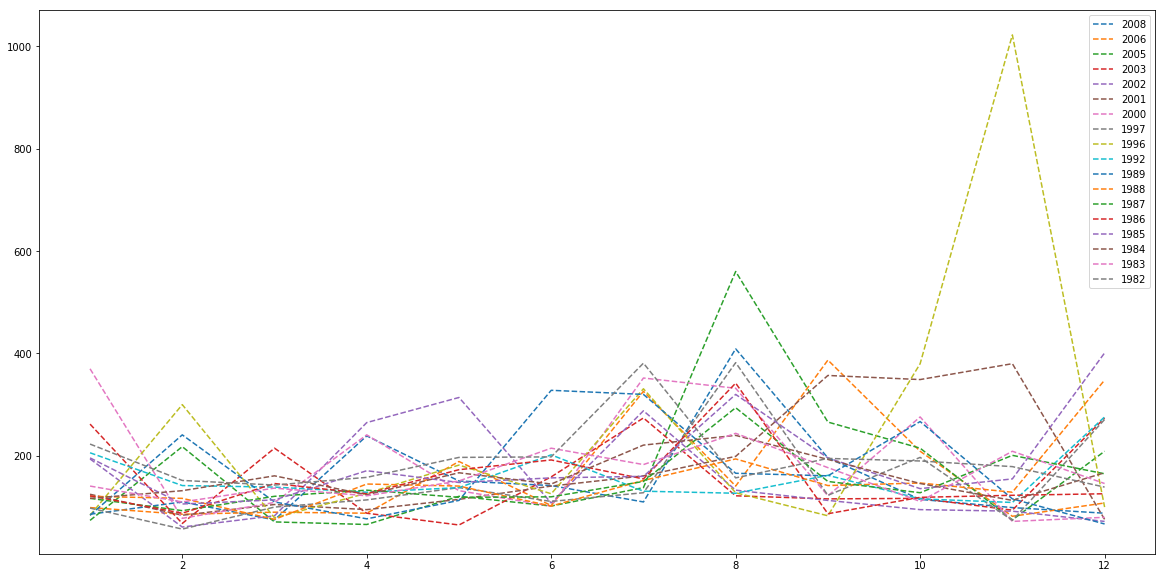

In [19]:
# SEARCHING FOR SEASONALITY
years = accidents["Year"].unique()[:-1]
months = []
for i in range(1,13):
    if i<=9:
        months.append("0{}".format(i))
    else: months.append("{}".format(i))
plt.figure(figsize=(20,10))
for year in years:
    upper_bound = np.datetime64("{0}-12-31".format(year))
    lower_bound = np.datetime64("{0}-01-01".format(year))
    df = accidents[(accidents["Event Date"]<=upper_bound)&(accidents["Event Date"]>=lower_bound)]
    month_year = []
    for month in months: 
        if month not in ["09","04","06","11","02"]:
            upper_bound2 = np.datetime64("{0}-{1}-31".format(year,month))
            lower_bound2= np.datetime64("{0}-{1}-01".format(year,month))
            month_injuries = df[(df["Event Date"]<=upper_bound2)&(df["Event Date"]>=lower_bound2)]\
            ["Total Injuries significant"].sum()
            month_year.append(month_injuries)
        elif month=="02":
            upper_bound2 = np.datetime64("{0}-02-28".format(year))
            lower_bound2= np.datetime64("{0}-02-01".format(year))
            month_injuries = df[(df["Event Date"]<=upper_bound2)&(df["Event Date"]>=lower_bound2)]\
            ["Total Injuries significant"].sum()
            month_year.append(month_injuries)
            
        else: 
            upper_bound2 = np.datetime64("{0}-{1}-30".format(year,month))
            lower_bound2= np.datetime64("{0}-{1}-01".format(year,month))
            month_injuries = df[(df["Event Date"]<=upper_bound2)&(df["Event Date"]>=lower_bound2)]\
            ["Total Injuries significant"].sum()
            month_year.append(month_injuries)
    x_values = np.arange(1,len(month_year)+1)
    if sum(month_year)>average_by_year:
        plt.plot(x_values,month_year,'--',label=year)
        
        plt.legend()
        
plt.show()   

In [20]:
# from mpl_toolkits.basemap import Basemap 

# VER read.py abajo de todo